In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

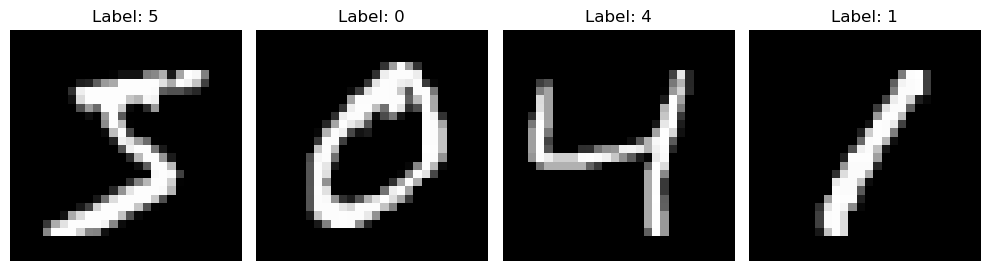

In [20]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
x_train = X_train.astype("float32") / 255.0
x_test = X_test.astype("float32") / 255.0
print(y_train)

[5 0 4 ... 5 6 8]


In [22]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [23]:
input_shape = (28,28,1)

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 6, strides = (1,1), kernel_size = (5,5), activation = 'tanh', input_shape = input_shape))
model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2)))
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (5,5), strides = (1,1), activation = 'tanh'))
model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2)))
model.add(tf.keras.layers.Conv2D(filters = 120, kernel_size = (5,5), strides = (1,1), activation = 'tanh',padding = 'SAME'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 84, activation = 'tanh'))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))


In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9149 - loss: 0.2809 - val_accuracy: 0.9768 - val_loss: 0.0714
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9764 - loss: 0.0756 - val_accuracy: 0.9808 - val_loss: 0.0590
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9806 - loss: 0.0678 - val_accuracy: 0.9828 - val_loss: 0.0545
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9835 - loss: 0.0558 - val_accuracy: 0.9830 - val_loss: 0.0524
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9828 - loss: 0.0532 - val_accuracy: 0.9846 - val_loss: 0.0479
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9830 - loss: 0.0538 - val_accuracy: 0.9829 - val_loss: 0.0571
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9857 - loss: 0.0456 - val_accuracy: 0.9849 - val_loss: 0.0449
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9861 - loss: 0.0445 - 

KeyboardInterrupt: 

In [ ]:
result = model.evaluate(X_test, y_test, verbose = 0)
print("Test loss : ",result[0])
print("Test accuracy : ",result[1])